In [38]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as ps
import joblib
import warnings
warnings.filterwarnings('ignore')

In [39]:
df_red = pd.read_csv("../data/wine_final_red_todo.csv")
df_red.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            6.7              0.58         0.08             1.8      0.097   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 15.0                  65.0   0.9959  3.28       0.54   

   alcohol  quality tipo_calidad color  
0      9.4        5      Mediana   red  
1      9.8        5      Mediana   red  
2      9.8        5      Mediana   red  
3      9.8        6        Buena   red  
4      9.4        5      Mediana   red  
5      9.4        5      Mediana   red  
6      9.4        5      Mediana   red  
7     10.0        7        Buena   red  
8      9.5        7        Buena   red  
9      9.2        5      Mediana   red

In [40]:
df_white = pd.read_csv("../data/wine_final_white_todo.csv")
df_white.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   
7            7.0              0.27         0.36            20.7      0.045   
8            6.3              0.30         0.34             1.6      0.049   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 30.0                  97.0   0.9951  3.26       0.44   
6                 30.0                 136.0   0.9949  3.18       0.47   
7                 45.0                 170.0   1.0010  3.00       0.45   
8                 14.0                 132.0   0.9940  3.30       0.49   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  quality tipo_calidad  color  
0      8.8        6        Buena  white  
1      9.5        6        Buena  white  
2     10.1        6        Buena  white  
3      9.9        6        Buena  white  
4      9.9        6        Buena  white  
5     10.1        6        Buena  white  
6      9.6        6        Buena  white  
7      8.8        6        Buena  white  
8      9.5        6        Buena  white  
9     11.0        6        Buena  white

In [41]:
#union de  las  datos de vino tinto y blanco juntos
df = df_red.append(df_white, ignore_index = True)
print(f'Composicion del Data Frame (rows, columns): {df.shape}')
df

Composicion del Data Frame (rows, columns): (5037, 14)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
5032            6.2              0.21         0.29             1.6      0.039   
5033            6.6              0.32         0.36             8.0      0.047   
5034            6.5              0.24         0.19             1.2      0.041   
5035            5.5              0.29         0.30             1.1      0.022   
5036            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
5032                 24.0                  92.0  0.99114  3.27       0.50   
5033                 57.0                 168.0  0.99490  3.15       0.46   
5034                 30.0                 111.0  0.99254  2.99       0.46   
5035                 20.0                 110.0  0.98869  3.34       0.38   
5036                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality tipo_calidad  color  
0         9.4        5      Mediana    red  
1         9.8        5      Mediana    red  
2         9.8        5      Mediana    red  
3         9.8        6        Buena    red  
4         9.4        5      Mediana    red  
...       ...      ...          ...    ...  
5032     11.2        6        Buena  white  
5033      9.6        5      Mediana  white  
5034      9.4        6        Buena  white  
5035     12.8        7        Buena  white  
5036     11.8        6        Buena  white  

[5037 rows x 14 columns]

In [42]:
df = df.reindex(columns=["color","fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"])
df.rename(columns={'color':'wine_type'},inplace=True)
df.head()


wine_type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0       red            7.4              0.70         0.00             1.9   
1       red            7.8              0.88         0.00             2.6   
2       red            7.8              0.76         0.04             2.3   
3       red           11.2              0.28         0.56             1.9   
4       red            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        5  
3       0.58      9.8        6  
4       0.56      9.4        5

In [43]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5037.000000       5037.000000  5037.000000     5037.000000   
mean        7.128956          0.324697     0.305950        5.408785   
std         1.113448          0.150817     0.119913        4.686900   
min         4.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.220000     0.250000        1.800000   
50%         6.900000          0.280000     0.300000        2.800000   
75%         7.600000          0.380000     0.380000        8.100000   
max        12.300000          1.005000     0.730000       22.000000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5037.000000          5037.000000           5037.000000  5037.000000   
mean      0.050942            30.120409            115.174509     0.994540   
std       0.018869            16.174677             55.619411     0.002865   
min       0.015000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             78.000000     0.992150   
50%       0.047000            29.000000            117.000000     0.994800   
75%       0.059000            41.000000            155.000000     0.996800   
max       0.119000            80.000000            255.000000     1.001960   

                pH    sulphates      alcohol      quality  
count  5037.000000  5037.000000  5037.000000  5037.000000  
mean      3.218817     0.516831    10.499715     5.815168  
std       0.148287     0.120583     1.147178     0.754510  
min       2.820000     0.220000     8.400000     4.000000  
25%       3.120000     0.430000     9.500000     5.000000  
50%       3.210000     0.500000    10.400000     6.000000  
75%       3.320000     0.590000    11.300000     6.000000  
max       3.680000     0.980000    14.200000     7.000000

In [44]:
len(df.quality.unique())

4

In [45]:
Sum = df.isnull().sum()
Percentage = ( df.isnull().sum()/df.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

Sum  Percentage
wine_type               0         0.0
fixed acidity           0         0.0
volatile acidity        0         0.0
citric acid             0         0.0
residual sugar          0         0.0
chlorides               0         0.0
free sulfur dioxide     0         0.0
total sulfur dioxide    0         0.0
density                 0         0.0
pH                      0         0.0
sulphates               0         0.0
alcohol                 0         0.0
quality                 0         0.0

In [46]:
def busqueda_valor(df):
    values = {}
    for feat in df.columns:
        if df[feat].isna().any():
            values[feat] = round(df[feat].mean(),2)
    return values

In [47]:
values = busqueda_valor(df)
values

{}

In [48]:
df.fillna(value=values,inplace=True)

<AxesSubplot:>

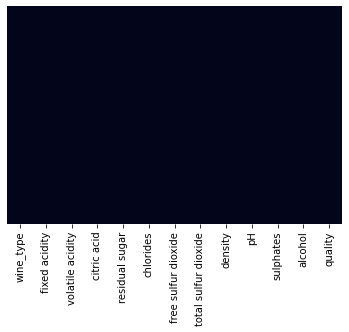

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

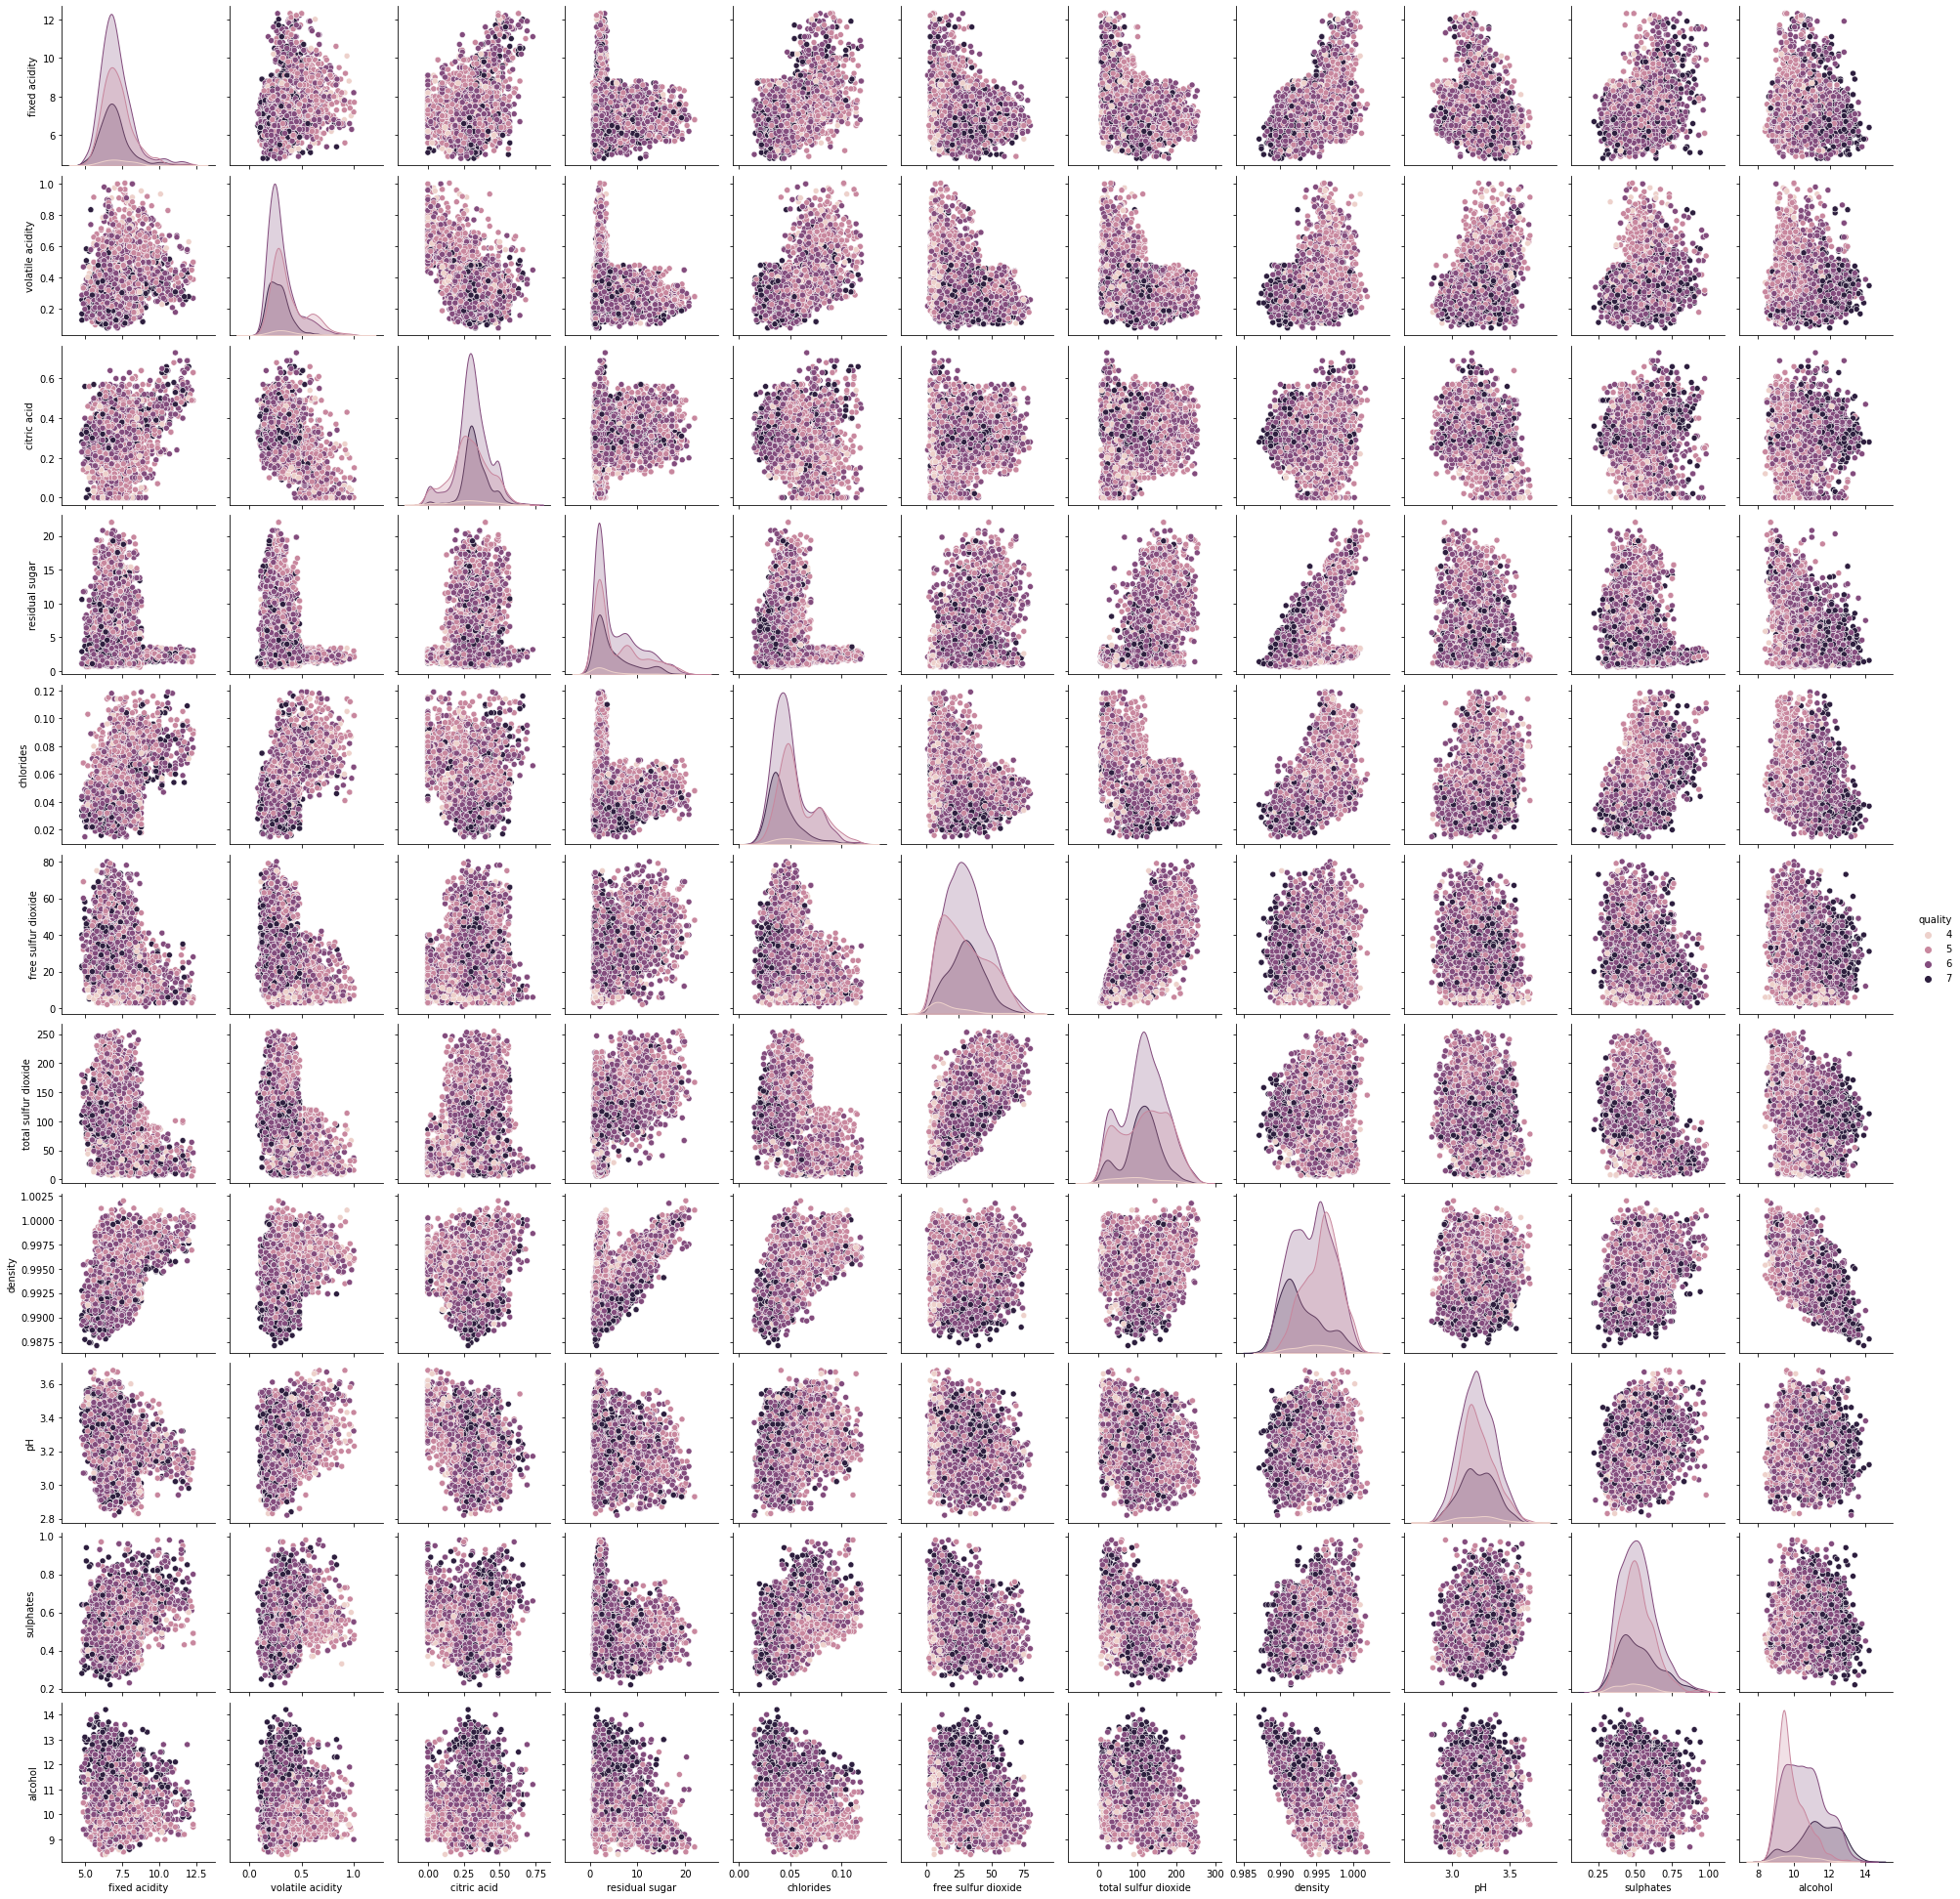

In [13]:
sns.pairplot(df, hue="quality")

Text(0, 0.5, ' Diagrama de Correlacion')

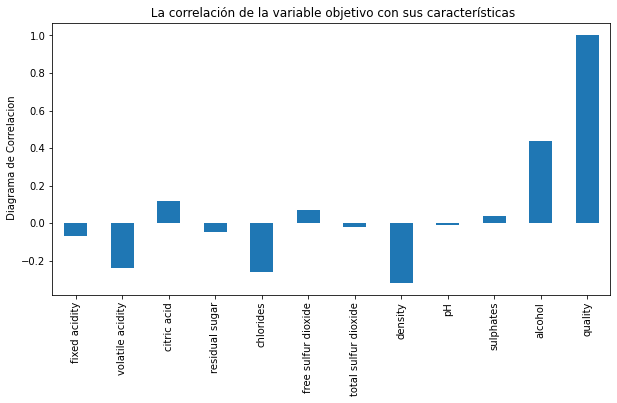

In [14]:
plt.figure(figsize=(10,5))
ax = df.corr()['quality'].plot(kind='bar',title=' La correlación de la variable objetivo con sus características')
ax.set_ylabel(' Diagrama de Correlacion')

<AxesSubplot:title={'center':'Mapa de calor'}>

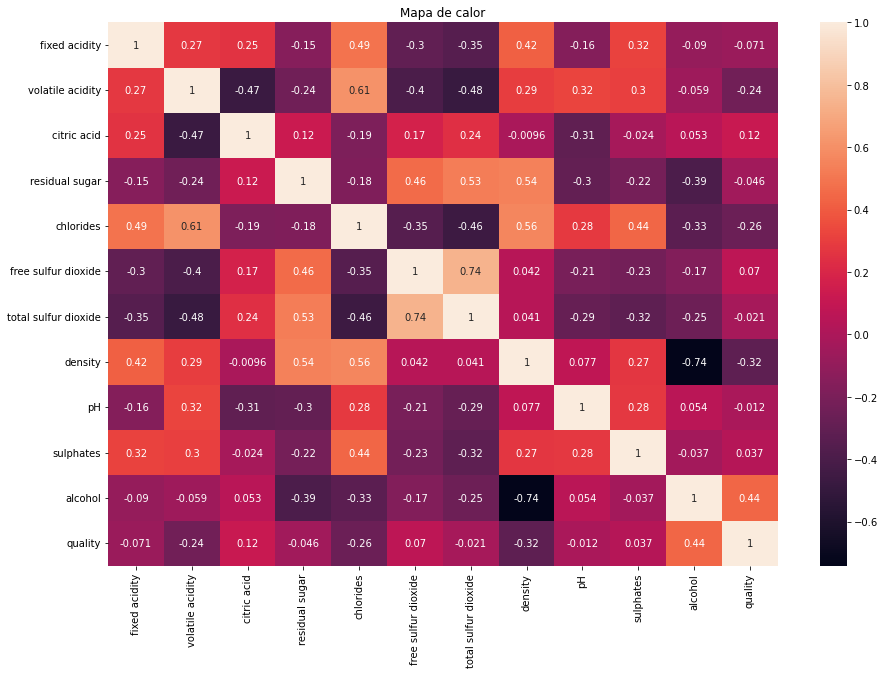

In [15]:
plt.figure(figsize=(15,10));plt.subplot(title = 'Mapa de calor')
sns.heatmap(df.corr(),annot=True)

In [16]:
df.head()

wine_type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0       red            7.4              0.70         0.00             1.9   
1       red            7.8              0.88         0.00             2.6   
2       red            7.8              0.76         0.04             2.3   
3       red           11.2              0.28         0.56             1.9   
4       red            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        5  
3       0.58      9.8        6  
4       0.56      9.4        5

In [17]:
#Cambios el objerct del wine_type por un Int
df.wine_type = df.wine_type.map({'white':0, 'red':1})

In [18]:
df.head()

wine_type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0          1            7.4              0.70         0.00             1.9   
1          1            7.8              0.88         0.00             2.6   
2          1            7.8              0.76         0.04             2.3   
3          1           11.2              0.28         0.56             1.9   
4          1            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        5  
3       0.58      9.8        6  
4       0.56      9.4        5

Grafica: Cantidad de vino que hay segun su calidad


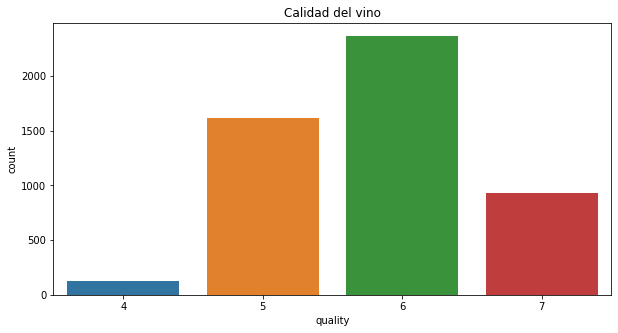

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="quality").set_title("Calidad del vino")
print("Grafica: Cantidad de vino que hay segun su calidad")

# Con estos datos, nos podemos a entrenar el algoritmo

In [32]:
import tpot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
X = df.drop(columns=['quality'],axis=1) 
y = df.quality

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [34]:
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [35]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('Comparacion', '*'*40,
      'Accuracy in Train set   : {:.3f}'.format(train_accuracy), 
      'Accuracy in Test  set   : {:.3f}'.format(test_accuracy), sep='\n')

Comparacion
****************************************
Accuracy in Train set   : 0.499
Accuracy in Test  set   : 0.476


In [50]:
df_bins3= df.copy()

In [72]:
bins3 = [0,4,5,8]
# 'bajo'=0,'mediano'=1, 'alto'=2
labels = [0,1,2] 

df_bins3['quality_range']= pd.cut(x=df_bins3['quality'], bins=bins3, labels=labels)


print(df_bins3[['quality_range','quality']].head(35))

   quality_range  quality
0              1        5
1              1        5
2              1        5
3              2        6
4              1        5
5              1        5
6              1        5
7              2        7
8              2        7
9              1        5
10             1        5
11             2        7
12             2        6
13             1        5
14             1        5
15             1        5
16             2        6
17             1        5
18             1        5
19             1        5
20             1        5
21             2        6
22             1        5
23             2        6
24             1        5
25             1        5
26             2        6
27             2        7
28             0        4
29             1        5
30             1        5
31             1        5
32             1        5
33             1        5
34             1        5


Grafica: Comprobamos que la inmensa mayoria es del tipo mediano


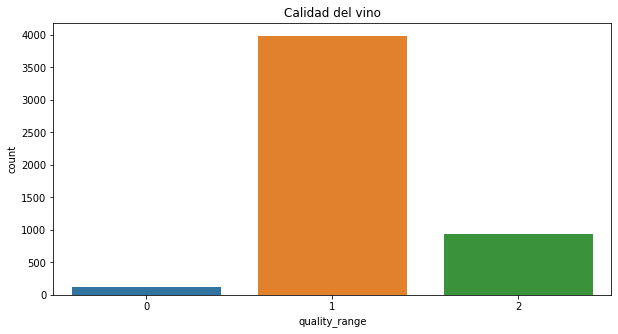

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_bins3, x="quality_range").set_title("Calidad del vino")
print("Grafica: Comprobamos que la inmensa mayoria es del tipo mediano")

In [73]:
df_bins3 = df_bins3.drop(columns=['quality'],axis=1).copy()

In [74]:
X = df_bins3.drop(columns=['quality_range'],axis=1)
y = df_bins3.quality_range

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [75]:
X.columns

Index(['wine_type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [76]:
lr    = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [77]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('Comparacion', '*'*40, 
      'Accuracy Score of Train Model : {:.3f}'.format(train_accuracy), 
      'Accuracy Score of Test  Model : {:.3f}'.format(test_accuracy), sep='-\n')

Comparacion-
****************************************-
Accuracy Score of Train Model : 0.702-
Accuracy Score of Test  Model : 0.710


# ![title](../image/AutoML.jpg)

### [TPOT](http://epistasislab.github.io/tpot/api/)

TPOTClassifier buscará en una amplia gama de algoritmos de clasificación supervisados, transformadores y sus parámetros.

Utilizamos el **TPOTClassifier** y no el **TPOTRegressor** pues el algoritmo resultante es un numero limitado de clases

In [78]:
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=10,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [79]:
AutoML.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/60 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7505614721884007

Generation 2 - Current best internal CV score: 0.7870449886719171

Generation 3 - Current best internal CV score: 0.7870449886719171

Generation 4 - Current best internal CV score: 0.7979661852873635

Generation 5 - Current best internal CV score: 0.7979661852873635

Best pipeline: KNeighborsClassifier(GradientBoostingClassifier(StandardScaler(input_matrix), learning_rate=0.1, max_depth=1, max_features=0.6500000000000001, min_samples_leaf=12, min_samples_split=12, n_estimators=100, subsample=0.6000000000000001), n_neighbors=55, p=2, weights=distance)


TPOTClassifier(generations=5, population_size=10, verbosity=2)

In [80]:
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=10,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

# [Model persistence](https://scikit-learn.org/stable/modules/model_persistence.html) ,  

**joblib es tener una forma de conservar el modelo para uso futuro sin tener que volver a entrenar**

In [81]:
AutoML.fit(X,y)
#Guardando modelo para despues utilizarlo
with open('modelo_wine.joblib', 'wb') as f:
    joblib.dump(lr,f)

Optimization Progress:   0%|          | 0/60 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6936827130719883

Generation 2 - Current best internal CV score: 0.6936827130719883

Generation 3 - Current best internal CV score: 0.6936827130719883

Generation 4 - Current best internal CV score: 0.6936827130719883

Generation 5 - Current best internal CV score: 0.6936827130719883

Best pipeline: MLPClassifier(GradientBoostingClassifier(KNeighborsClassifier(input_matrix, n_neighbors=19, p=1, weights=uniform), learning_rate=0.5, max_depth=1, max_features=0.45, min_samples_leaf=10, min_samples_split=7, n_estimators=100, subsample=0.7500000000000001), alpha=0.01, learning_rate_init=0.1)


### [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Calculamos la confusion de la  matriz  para evaluar  y predecir la precisión de una clasificación.

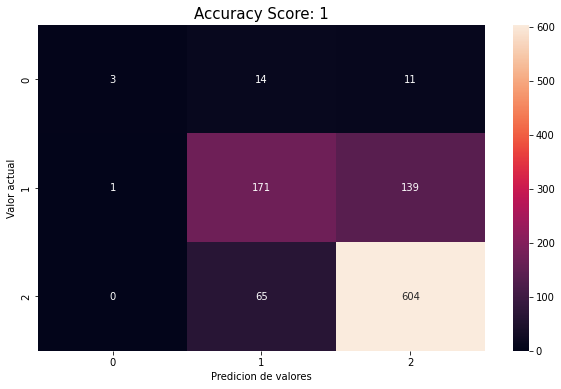

In [82]:
from sklearn.metrics import confusion_matrix as cm

predictions = AutoML.predict(X_test)
score = round(accuracy_score(y_test, predictions))
cm_1 = cm(y_test, predictions)
plt.figure(figsize=(10,6))
sns.heatmap(cm_1, annot=True, fmt=".0f")
plt.xlabel('Predicion de valores')
plt.ylabel('Valor actual')
plt.title('Accuracy Score: {}'.format(score), size = 15)
plt.show()

In [83]:
AutoML.export('pipeline.py')